In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from core import *

C:\Users\yul.a.yakimova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DONE


In [5]:
tickers = get_tickers()
print(tickers)


['Z.ADA' 'Z.BNB' 'Z.BTC' 'Z.DOGE' 'Z.DOT' 'Z.ETC' 'Z.ETH' 'Z.FIL' 'Z.LINK'
 'Z.LTC' 'Z.MATIC' 'Z.THETA' 'Z.UNI' 'Z.XRP']


In [9]:
raw_data = []
grid_data = []

for ticker in tickers:
    print(ticker)
    agg_mmf_data_raw, agg_price_grid_raw = get_market_data(ticker)
    raw_data.append(agg_mmf_data_raw)
    grid_data.append(grid_data)

Z.ADA
Z.BNB
Z.BTC
Z.DOGE
Z.DOT
Z.ETC
Z.ETH
Z.FIL
Z.LINK
Z.LTC
Z.MATIC
Z.THETA
Z.UNI
Z.XRP


In [10]:
with open(os.path.join(save_path, 'list_of_raw_data.pickle'), 'wb') as output:
  pickle.dump(raw_data, output)

with open(os.path.join(save_path, 'list_of_raw_grid_data.pickle'), 'wb') as output:
  pickle.dump(agg_price_grid_raw, output)

In [7]:
os.path.join(save_path, 'list_of_raw_data.pickle')


'saved/list_of_raw_data.pickle'

In [6]:
with open(os.path.join(save_path, 'list_of_raw_data.pickle'), 'rb') as input:
  raw_data = pickle.load(input)

with open(os.path.join(save_path, 'list_of_raw_grid_data.pickle'), 'rb') as input:
  agg_price_grid_raw = pickle.load(input)


In [13]:
mi_raw_data = convert_list_of_dfs_to_one_multi_index_df(raw_data, tickers)



BEST_BID  BEST_BID_VOL  BEST_ASK  \
ticker bar_time                                                          
Z.ADA  2021-01-01 00:02:01.217999872    0.1816       18566.0    0.1818   
       2021-01-01 00:05:06.065999872    0.1807         559.0    0.1807   
       2021-01-01 00:08:29.527000064    0.1797         792.0    0.1799   
       2021-01-01 00:10:31.216999936    0.1796       43448.0    0.1797   
       2021-01-01 00:12:11.052999936    0.1793        1717.0    0.1794   
...                                        ...           ...       ...   
Z.XRP  2021-10-31 23:37:08.680000000    1.1166        3886.4    1.1167   
       2021-10-31 23:42:08.324000000    1.1181        9108.3    1.1182   
       2021-10-31 23:47:08.182000128    1.1167       15385.9    1.1168   
       2021-10-31 23:52:08.168999936    1.1146       44454.6    1.1147   
       2021-10-31 23:56:50.848000000    1.1148        6072.6    1.1149   

                                      BEST_ASK_VOL     LAST     VOLUME  \
ticker bar_time                                                          
Z.ADA  2021-01-01 00:02:01.217999872       10000.0  0.18164   358715.0   
       2021-01-01 00:05:06.065999872         199.0  0.18072  1362524.0   
       2021-01-01 00:08:29.527000064       14802.0  0.17986  3453071.0   
       2021-01-01 00:10:31.216999936       21581.0  0.17965   641797.0   
       2021-01-01 00:12:11.052999936       55750.0  0.17934  1008179.0   
...                                            ...      ...        ...   
Z.XRP  2021-10-31 23:37:08.680000000        8321.2  1.11670  1504697.6   
       2021-10-31 23:42:08.324000000        7254.0  1.11810  1864551.7   
       2021-10-31 23:47:08.182000128       16203.6  1.11670  2496992.7   
       2021-10-31 23:52:08.168999936        4805.9  1.11470  1817714.8   
       2021-10-31 23:56:50.848000000       16469.7  1.11480   819407.3   

                                           DVOL     HIGH      LOW   ENTROPY  \
ticker bar_time                                                               
Z.ADA  2021-01-01 00:02:01.217999872    19355.0  0.18178  0.18150  2.926551   
       2021-01-01 00:05:06.065999872  -728620.0  0.18170  0.18062  4.296646   
       2021-01-01 00:08:29.527000064 -1519835.0  0.18082  0.17938  4.668423   
       2021-01-01 00:10:31.216999936   -37873.0  0.18003  0.17940  3.932215   
       2021-01-01 00:12:11.052999936  -368631.0  0.17976  0.17892  4.052969   
...                                         ...      ...      ...       ...   
Z.XRP  2021-10-31 23:37:08.680000000   609786.8  1.11740  1.11120  3.941593   
       2021-10-31 23:42:08.324000000   178009.3  1.11920  1.11500  3.583950   
       2021-10-31 23:47:08.182000128  -386995.7  1.11920  1.11670  3.056451   
       2021-10-31 23:52:08.168999936  -437741.2  1.11680  1.11370  3.288205   
       2021-10-31 23:56:50.848000000  -144862.3  1.11550  1.11370  2.641867   

                                      ...   MO_AVG_BUY   MO_AVG_SELL  \
ticker bar_time                       ...                              
Z.ADA  2021-01-01 00:02:01.217999872  ...  2223.941176   2495.294118   
       2021-01-01 00:05:06.065999872  ...  2018.802548   7631.912409   
       2021-01-01 00:08:29.527000064  ...  2700.050279  10447.281513   
       2021-01-01 00:10:31.216999936  ...  1863.962963   2855.756303   
       2021-01-01 00:12:11.052999936  ...  2190.232877   4814.020979   
...                                   ...          ...           ...   
Z.XRP  2021-10-31 23:37:08.680000000  ...  3608.335154   1429.569968   
       2021-10-31 23:42:08.324000000  ...  3057.726048   2472.936070   
       2021-10-31 23:47:08.182000128  ...  2955.177871   4131.788539   
       2021-10-31 23:52:08.168999936  ...  1943.624789   3115.270718   
       2021-10-31 23:56:50.848000000  ...  1729.602564   2755.056000   

                                      BREAK_BEST_DOWN  BREAK_BEST_UP  \
ticker bar_time                                                        
Z.A

In [14]:
mi_raw_data


BEST_BID  BEST_BID_VOL  BEST_ASK  \
ticker bar_time                                                          
Z.ADA  2021-01-01 00:02:01.217999872    0.1816       18566.0    0.1818   
       2021-01-01 00:05:06.065999872    0.1807         559.0    0.1807   
       2021-01-01 00:08:29.527000064    0.1797         792.0    0.1799   
       2021-01-01 00:10:31.216999936    0.1796       43448.0    0.1797   
       2021-01-01 00:12:11.052999936    0.1793        1717.0    0.1794   
...                                        ...           ...       ...   
Z.XRP  2021-10-31 23:37:08.680000000    1.1166        3886.4    1.1167   
       2021-10-31 23:42:08.324000000    1.1181        9108.3    1.1182   
       2021-10-31 23:47:08.182000128    1.1167       15385.9    1.1168   
       2021-10-31 23:52:08.168999936    1.1146       44454.6    1.1147   
       2021-10-31 23:56:50.848000000    1.1148        6072.6    1.1149   

                                      BEST_ASK_VOL     LAST     VOLUME  \
ticker bar_time                                                          
Z.ADA  2021-01-01 00:02:01.217999872       10000.0  0.18164   358715.0   
       2021-01-01 00:05:06.065999872         199.0  0.18072  1362524.0   
       2021-01-01 00:08:29.527000064       14802.0  0.17986  3453071.0   
       2021-01-01 00:10:31.216999936       21581.0  0.17965   641797.0   
       2021-01-01 00:12:11.052999936       55750.0  0.17934  1008179.0   
...                                            ...      ...        ...   
Z.XRP  2021-10-31 23:37:08.680000000        8321.2  1.11670  1504697.6   
       2021-10-31 23:42:08.324000000        7254.0  1.11810  1864551.7   
       2021-10-31 23:47:08.182000128       16203.6  1.11670  2496992.7   
       2021-10-31 23:52:08.168999936        4805.9  1.11470  1817714.8   
       2021-10-31 23:56:50.848000000       16469.7  1.11480   819407.3   

                                           DVOL     HIGH      LOW   ENTROPY  \
ticker bar_time                                                               
Z.ADA  2021-01-01 00:02:01.217999872    19355.0  0.18178  0.18150  2.926551   
       2021-01-01 00:05:06.065999872  -728620.0  0.18170  0.18062  4.296646   
       2021-01-01 00:08:29.527000064 -1519835.0  0.18082  0.17938  4.668423   
       2021-01-01 00:10:31.216999936   -37873.0  0.18003  0.17940  3.932215   
       2021-01-01 00:12:11.052999936  -368631.0  0.17976  0.17892  4.052969   
...                                         ...      ...      ...       ...   
Z.XRP  2021-10-31 23:37:08.680000000   609786.8  1.11740  1.11120  3.941593   
       2021-10-31 23:42:08.324000000   178009.3  1.11920  1.11500  3.583950   
       2021-10-31 23:47:08.182000128  -386995.7  1.11920  1.11670  3.056451   
       2021-10-31 23:52:08.168999936  -437741.2  1.11680  1.11370  3.288205   
       2021-10-31 23:56:50.848000000  -144862.3  1.11550  1.11370  2.641867   

                                      ...   MO_AVG_BUY   MO_AVG_SELL  \
ticker bar_time                       ...                              
Z.ADA  2021-01-01 00:02:01.217999872  ...  2223.941176   2495.294118   
       2021-01-01 00:05:06.065999872  ...  2018.802548   7631.912409   
       2021-01-01 00:08:29.527000064  ...  2700.050279  10447.281513   
       2021-01-01 00:10:31.216999936  ...  1863.962963   2855.756303   
       2021-01-01 00:12:11.052999936  ...  2190.232877   4814.020979   
...                                   ...          ...           ...   
Z.XRP  2021-10-31 23:37:08.680000000  ...  3608.335154   1429.569968   
       2021-10-31 23:42:08.324000000  ...  3057.726048   2472.936070   
       2021-10-31 23:47:08.182000128  ...  2955.177871   4131.788539   
       2021-10-31 23:52:08.168999936  ...  1943.624789   3115.270718   
       2021-10-31 23:56:50.848000000  ...  1729.602564   2755.056000   

                                      BREAK_BEST_DOWN  BREAK_BEST_UP  \
ticker bar_time                                                        
Z.A

In [50]:
tickers[2]

'Z.BTC'

In [18]:
btc = raw_data[2].copy()

In [19]:
btc

,BEST_BID,BEST_BID_VOL,BEST_ASK,BEST_ASK_VOL,LAST,VOLUME,DVOL,HIGH,LOW,ENTROPY,...,MO_AVG_BUY,MO_AVG_SELL,BREAK_BEST_DOWN,BREAK_BEST_UP,ASK_VOLUME,BID_VOLUME,VWAP,HOUR,MINUTE,BAR_DURATION
bar_time,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:02:01.217999872,29036.96,1.420,29036.97,5.965,29036.96,399.931,188.181,29045.93,28935.30,6.620202,...,0.442855,0.166470,236.0,323.0,2077.826,3372.398,29002.426137,0.0,2.0,1.000000e+00
2021-01-01 00:05:06.065999872,28973.19,0.636,28977.01,0.015,28976.82,305.718,-8.962,29036.97,28973.19,5.820529,...,0.265435,0.212049,292.0,240.0,2846.661,4326.110,29010.787195,0.0,5.0,1.848480e+11
2021-01-01 00:08:29.527000064,28927.45,0.360,28927.46,0.318,28927.46,288.345,-132.935,28986.57,28904.00,6.327164,...,0.099878,0.403525,309.0,380.0,3079.641,4681.437,28952.967225,0.0,8.0,2.034610e+11
2021-01-01 00:10:31.216999936,28878.74,2.031,28878.75,0.309,28878.74,301.883,-67.393,28948.37,28865.66,6.372199,...,0.140413,0.397071,269.0,299.0,3267.240,4921.014,28902.668793,0.0,10.0,1.216900e+11
2021-01-01 00:12:11.052999936,28864.63,0.013,28864.64,2.073,28864.64,378.106,-116.416,28890.00,28801.00,6.500737,...,0.155583,0.537524,278.0,290.0,3271.583,5294.535,28846.049753,0.0,12.0,9.983600e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31 23:37:08.680000000,61485.13,0.110,61485.14,2.052,61485.13,309.671,31.341,61490.88,61365.80,6.283181,...,0.220577,0.263570,201.0,265.0,5718.532,15314.253,61433.299813,23.0,37.0,2.434240e+11
2021-10-31 23:42:08.324000000,61456.63,0.394,61456.64,1.072,61456.63,203.459,-24.631,61512.92,61445.92,5.971960,...,0.158535,0.193954,201.0,208.0,5747.124,15300.167,61477.773599,23.0,42.0,2.996440e+11
2021-10-31 23:47:08.182000128,61469.74,1.447,61469.75,0.084,61469.74,209.006,-13.966,61499.99,61432.58,5.944232,...,0.186463,0.194906,158.0,240.0,5740.073,15316.801,61468.738648,23.0,47.0,2.998580e+11


In [20]:
btc.keys()

Index(['BEST_BID', 'BEST_BID_VOL', 'BEST_ASK', 'BEST_ASK_VOL', 'LAST',
       'VOLUME', 'DVOL', 'HIGH', 'LOW', 'ENTROPY', 'COUNT', 'COUNT_BUY',
       'COUNT_SELL', 'MO_COUNT', 'MO_COUNT_BUY', 'MO_COUNT_SELL', 'MO_AVG',
       'MO_AVG_BUY', 'MO_AVG_SELL', 'BREAK_BEST_DOWN', 'BREAK_BEST_UP',
       'ASK_VOLUME', 'BID_VOLUME', 'VWAP', 'HOUR', 'MINUTE', 'BAR_DURATION'],
      dtype='object')

In [21]:
btc['HIGH-LOW'] = btc.HIGH - btc.LOW

In [22]:
btc['HIGH/LOW'] = btc.HIGH / btc.LOW

In [23]:
btc['HIGH_{i+1}/HIGH_i'] = btc.HIGH / btc.HIGH.shift(-1)

In [24]:
from sklearn.preprocessing import QuantileTransformer

qt=QuantileTransformer(output_distribution='normal')

btc = pd.DataFrame(data=qt.fit_transform(btc), index=btc.index, columns=btc.columns)

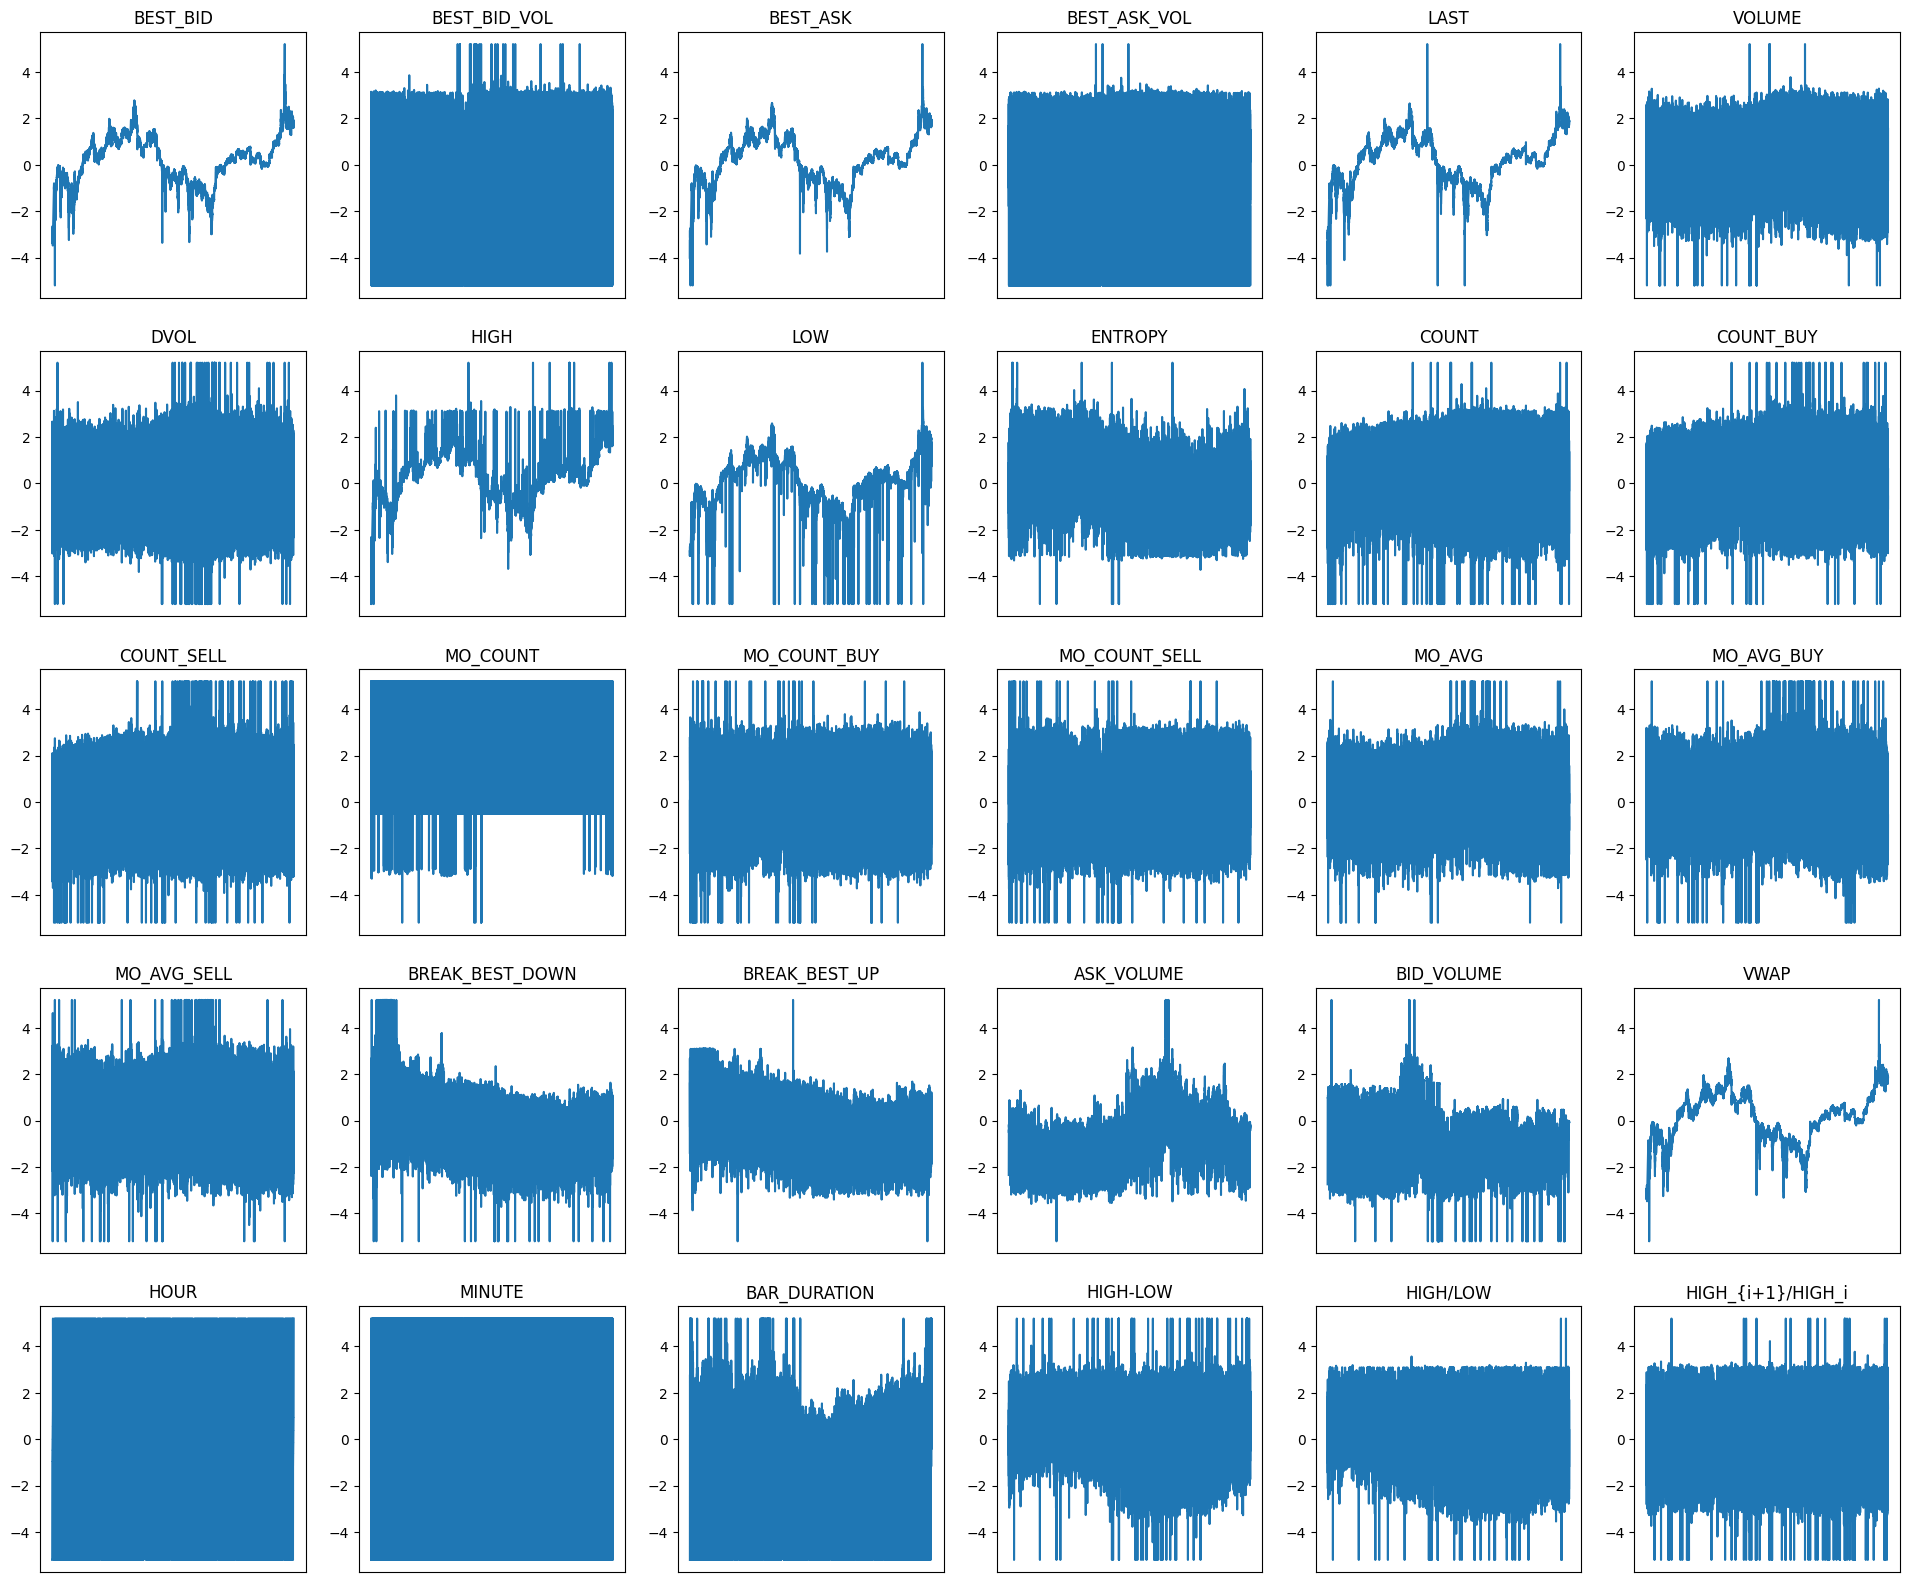

In [27]:
N = len(btc.keys())

col = int(np.ceil(np.sqrt(N)))
row = int(np.ceil(N / col))
size = 4
fig, axes = plt.subplots(row, col, figsize=(size*col, size*row))

for idx, column in enumerate(btc.keys()):
    x_y = divmod(idx, col)
    axes[x_y].plot(btc[column])
    axes[x_y].set_title(column)
    axes[x_y].get_xaxis().set_visible(False)
    # axes[x_y].yaxis.set_major_formatter(plt.LogFormatter())
    # axes[x_y].set_yscale('log')


plt.show()